In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [37]:
df = pd.read_csv('../cleaned_data/final_df.csv', index_col=0)
pd.set_option('display.max_columns', None)


In [38]:
df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3392,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0
1,3392,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,3.0,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0
2,3392,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,5.0,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0
3,3392,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,6.0,4.0,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0
4,3392,6,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,128,8.0,4.0,9.27,4.0,1,809.98,27.262259,270.0,1,49.574949,62.430172,1,340.479212,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79614,37932,4,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,23.0,7.0,11.50,3.0,1,502.38,34.663572,378.0,1,35.104023,60.971333,0,479.866228,1
79615,37932,5,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,18.0,7.0,11.50,3.0,1,502.38,40.565631,379.0,1,35.104023,54.185950,1,496.651610,1
79616,37932,6,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,27.0,6.0,11.50,3.0,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083,1
79617,37932,7,25.0,9,39628.99,3359.415833,4.0,6.0,7.0,2.0,683,20.0,6.0,11.50,3.0,1,502.38,33.638208,381.0,1,35.104023,251.672582,3,319.164979,2


In [39]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [41]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)


In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
# Make predictions on the test data
y_pred = rf.predict(X_test)


In [44]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3853
           1       0.81      0.85      0.83      7409
           2       0.85      0.82      0.83     12624

    accuracy                           0.83     23886
   macro avg       0.82      0.82      0.82     23886
weighted avg       0.83      0.83      0.83     23886



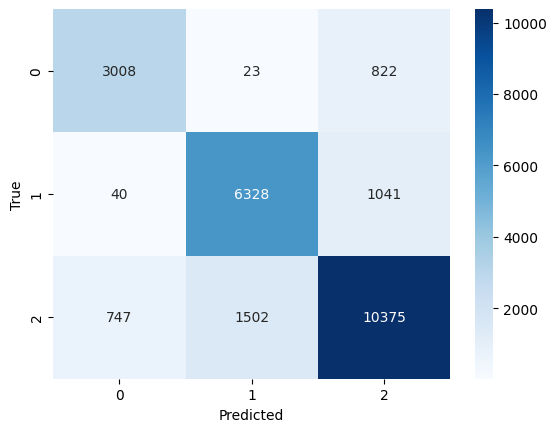

In [45]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [46]:
# So lets try to improve the accuracy by trying to balance the datasets 

In [47]:
df_copy = df.copy() 

In [48]:
df_copy['Credit_Score'].value_counts() 

Credit_Score
2    41808
1    24915
0    12896
Name: count, dtype: int64

In [49]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_copy[(df_copy['Credit_Score']==2)] 
df_minority = df_copy[(df_copy['Credit_Score']==1)] 
df_minority2 = df_copy[(df_copy['Credit_Score']==0)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
df_minority_upsampled2 = resample(df_minority2, 
                                 replace=True,    # sample with replacement
                                 n_samples= 41808, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_minority_upsampled2, df_majority])

In [50]:
df_upsampled = df_upsampled.drop(df.columns[0], axis=1)

In [51]:
df_upsampled.to_csv('../cleaned_data/upsampled_final_df.csv')

Credit_Score
1    41808
0    41808
2    41808
Name: count, dtype: int64

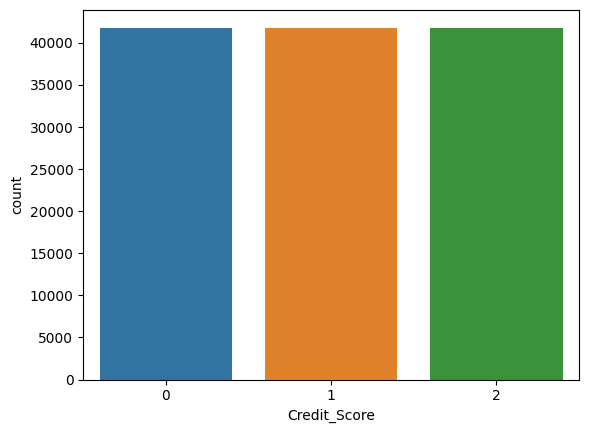

In [52]:
#Counting 1 and 0 Value in Response column
sns.countplot(x = 'Credit_Score', data = df_upsampled)
df_upsampled['Credit_Score'].value_counts()

In [53]:
df2= df_upsampled.copy()

In [54]:
X = df2.drop('Credit_Score', axis=1)
y = df2['Credit_Score']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)


In [ ]:
rf.fit(X_train, y_train)




In [ ]:
# Make predictions on the test data
y_pred = rf.predict(X_test)


In [ ]:
report = classification_report(y_test, y_pred)
print(report )

In [ ]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Hence we were able to increase the Accuracy of the Random Forest Classifier from 82% to 91% . Also the Overall classification report is also improved. 

In [ ]:
# From the Hyperparamter tunining the best parameter was found 

In [ ]:
# best_param = {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}

In [ ]:
best_param= {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
best_model =  RandomForestClassifier(**best_param)

In [ ]:
best_model.fit(X_train, y_train)

Accuracy: 0.9131232061230998


In [ ]:
# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
report = classification_report(y_test, y_pred)
print(report )

In [ ]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import pickle

# Define the path and filename for the .pkl file
filename = '../models/rf_model.pkl'

# Open a file in binary mode and save the model using the pickle module
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)